In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
header = ["regression_name", "dataset", "poisoning_threshold", "dataset_size", "num_lookups", "mean", "median", "log_error", "d_log_error", "mse_error", "build_time"]
legitimate_df = pd.read_csv("../data/benchmark_legitimate.csv", delimiter = ";", names = header)
poisoned_df = pd.read_csv("../data/benchmark_poisoned.csv", delimiter = ";", names = header)

In [10]:
legitimate_df.head()

,regression_name,dataset,poisoning_threshold,dataset_size,num_lookups,mean,median,log_error,d_log_error,mse_error,build_time
0,SLR,poisoning,0.01,100,1000000,16.4558,16.383,128,144,446,1000
1,LogTE,poisoning,0.01,100,1000000,17.9959,17.924,126,145,534,24000
2,DLogTE,poisoning,0.01,100,1000000,17.9210,17.779,129,143,809,14000
3,2P,poisoning,0.01,100,1000000,16.8835,16.865,126,139,453,136000
4,TheilSen,poisoning,0.01,100,1000000,15.8567,15.821,130,147,463,6483000


In [11]:
datasets = ["poisoning"]
regressions = ["SLR", "LogTE", "DLogTE", "2P", "TheilSen", "LAD", "ALEX"]
# poisoning thresholds in range 0.01, 0.02, ... 0.20
#poisoning_thresholds = np.arange(0.01, 0.21, 0.01)
poisoning_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20]

In [12]:
median_lookup_time_impact = {}

for dataset in datasets:
    # calculate ratio loss for different datasets / regression methods
    # ratio loss: MSE_poisoned / MSE_legit
    median_lookup_time_impact_per_regression = {}

    for regression in regressions:

        median_lookup_time_impact_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['median']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['median']
            median_lookup_time_impact_per_poisoning_threshold.append(lookup_time_poisoned.values[0] / lookup_time_legit.values[0])

        median_lookup_time_impact_per_regression[regression] = median_lookup_time_impact_per_poisoning_threshold

    median_lookup_time_impact[dataset] = median_lookup_time_impact_per_regression

In [13]:
mean_lookup_time_impact = {}

for dataset in datasets:
    # calculate ratio loss for different datasets / regression methods
    # ratio loss: MSE_poisoned / MSE_legit
    mean_lookup_time_impact_per_regression = {}

    for regression in regressions:

        mean_lookup_time_impact_per_poisoning_threshold = []
        for poisoning_threshold in poisoning_thresholds:
            lookup_time_legit = legitimate_df[(legitimate_df['dataset'] == dataset) & (legitimate_df["regression_name"] == regression) & (legitimate_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            lookup_time_poisoned = poisoned_df[(poisoned_df['dataset'] == dataset) & (poisoned_df["regression_name"] == regression) & (poisoned_df["poisoning_threshold"] == poisoning_threshold)]['mean']
            mean_lookup_time_impact_per_poisoning_threshold.append(lookup_time_poisoned.values[0] / lookup_time_legit.values[0])

        mean_lookup_time_impact_per_regression[regression] = mean_lookup_time_impact_per_poisoning_threshold

    mean_lookup_time_impact[dataset] = mean_lookup_time_impact_per_regression

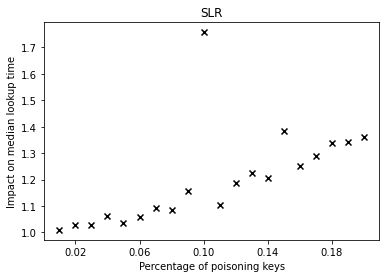

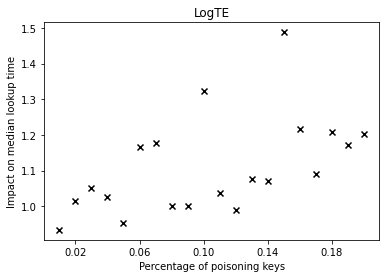

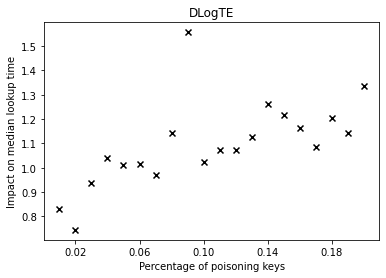

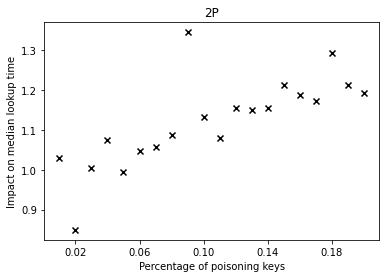

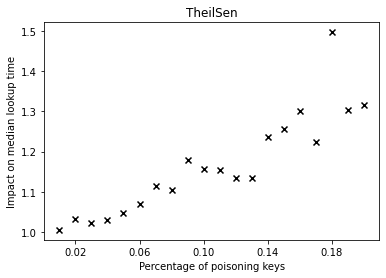

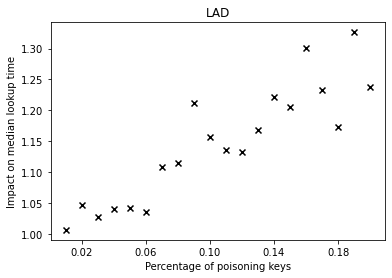

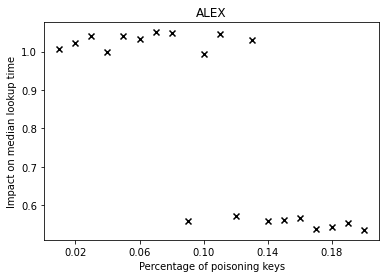

In [14]:
for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, median_lookup_time_impact[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        plt.title(regression)
        plt.xlabel('Percentage of poisoning keys')
        plt.ylabel('Impact on median lookup time')
        plt.show()

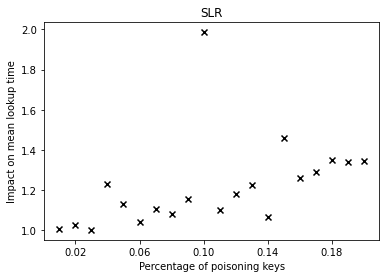

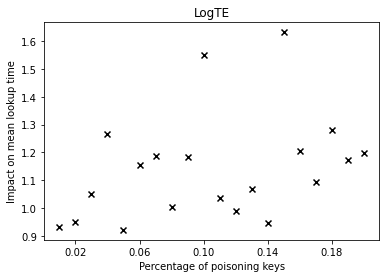

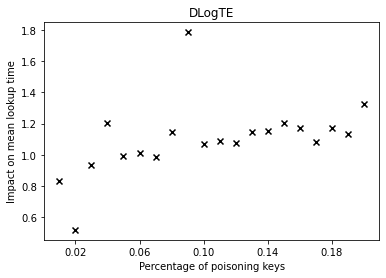

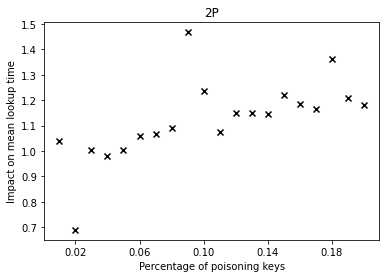

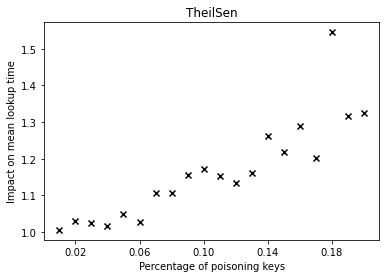

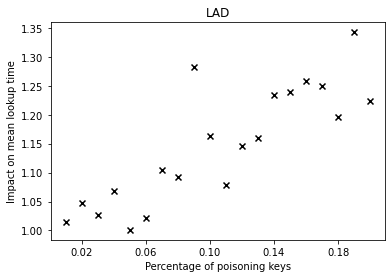

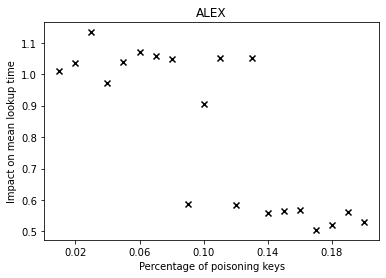

In [15]:
for dataset in datasets:

    for regression in regressions:

        plt.scatter(poisoning_thresholds, mean_lookup_time_impact[dataset][regression],  color='black', marker="x")
        plt.xticks(np.arange(0.02, 0.22, 0.04))
        plt.title(regression)
        plt.xlabel('Percentage of poisoning keys')
        plt.ylabel('Impact on mean lookup time')
        plt.show()